# Import the libraries

Import all the libraries to be sued

In [1]:
from pandas_datareader.data import  DataReader
from pandas_datareader import data

import datetime
import pandas as pd 
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
'''
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)
'''


C:\Users\ANPC\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


"\npd.set_option('display.max_columns', None)\npd.set_option('display.max_rows', None)\npd.set_option('display.max_colwidth', -1)\n"

# Import Data

1. Get all the csv.data from local drive 
2. Import the csv files into pandas dataframes
3. There are 6 dataframes for 6 stocks data: Apple, Amazon, Facebook, Alphabet(Goolge), Microsoft and S&P500 index

In [2]:
import os
working_dir = r'C:\Users\ANPC\Documents\USYD\5310\Assignment'
read_csv_setting = {'index_col': 0}

directory = f'{working_dir}/Data/'
dfs = []

for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        filepath= os.path.join(directory, filename)        
        dfs.append(pd.read_csv(os.path.join(directory, filename),**read_csv_setting) )
        dfs[-1].name =filename.replace('.csv','')
        print(dfs[-1].name)   
    else:
        continue

Tickers = [df.name for df in dfs]
print(dfs[0].columns)

AAPL
AMZN
FB
GOOGL
MSFT
^GSPC
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


## Reshape the pandas dataframes to multi-index columns dataframes

In [3]:
dfc = [] 
colnames = list(dfs[0].columns)

for colname in colnames:
    coldict = {}
    for i in range(len(dfs)):
        coldict.update({dfs[i].name: dfs[i][colname]})
    dfc.append(pd.concat(coldict ,axis =1))
    dfc[-1].name =dfs[i].name
    
d = {'Close' : dfc[3], 'Adj Close' : dfc[4], 'Open' : dfc[0], 'High' : dfc[1], 'Low' : dfc[2], 'Volume' : dfc[5]}
dataSet= pd.concat(d.values(), axis=1, keys=d.keys())


## Display and explore the data

In [4]:
print('data shape:' + str(dataSet.shape))
print('total data point:' + str(dataSet.size))
dataSet

data shape:(2517, 36)
total data point:90612


Close                                                    \
                  AAPL         AMZN          FB        GOOGL        MSFT   
2010-04-01   33.709999   131.809998         NaN   284.684692   29.160000   
2010-04-05   34.070000   131.490005         NaN   285.790802   29.270000   
2010-04-06   34.220001   135.559998         NaN   284.394409   29.320000   
2010-04-07   34.371429   134.869995         NaN   282.052063   29.350000   
2010-04-08   34.278572   140.960007         NaN   284.029022   29.920000   
...                ...          ...         ...          ...         ...   
2020-03-25  245.520004  1885.839966  156.210007  1101.619995  146.919998   
2020-03-26  258.440002  1955.489990  163.339996  1162.920044  156.110001   
2020-03-27  247.740005  1900.099976  156.789993  1110.260010  149.699997   
2020-03-30  254.809998  1963.949951  165.949997  1146.310059  160.229996   
2020-03-31  254.289993  1949.719971  166.800003  1161.949951  157.710007   

                          Adj Close                                        \
                  ^GSPC        AAPL         AMZN          FB        GOOGL   
2010-04-01  1178.099976   29.261658   131.809998         NaN   284.684692   
2010-04-05  1187.439941   29.574146   131.490005         NaN   285.790802   
2010-04-06  1189.439941   29.704361   135.559998         NaN   284.394409   
2010-04-07  1182.449951   29.835800   134.869995         NaN   282.052063   
2010-04-08  1186.439941   29.755198   140.960007         NaN   284.029022   
...                 ...         ...          ...         ...          ...   
2020-03-25  2475.560059  245.520004  1885.839966  156.210007  1101.619995   
2020-03-26  2630.070068  258.440002  1955.489990  163.339996  1162.920044   
2020-03-27  2541.469971  247.740005  1900.099976  156.789993  1110.260010   
2020-03-30  2626.649902  254.809998  1963.949951  165.949997  1146.310059   
2020-03-31  2584.590088  254.289993  1949.719971  166.800003  1161.949951   

            ...         Low                                           Volume  \
            ...          FB        GOOGL        MSFT        ^GSPC       AAPL   
2010-04-01  ...         NaN   283.058044   28.620001  1170.689941  150786300   
2010-04-05  ...         NaN   284.784790   29.030001  1178.709961  171126900   
2010-04-06  ...         NaN   282.982971   28.980000  1182.770020  111754300   
2010-04-07  ...         NaN   281.211212   29.139999  1177.250000  157125500   
2010-04-08  ...         NaN   280.305298   29.299999  1175.119995  143247300   
...         ...         ...          ...         ...          ...        ...   
2020-03-25  ...  153.059998  1083.010010  144.440002  2407.530029   75900500   
2020-03-26  ...  157.020004  1092.030029  148.369995  2500.719971   63021800   
2020-03-27  ...  154.750000  1104.000000  149.199997  2520.020020   51054200   
2020-03-30  ...  158.059998  1098.489990  150.009995  2545.280029   41994100   
2020-03-31  ...  164.199997  1136.719971  156.559998  2571.149902   49250500   

                                                                 
                AMZN          FB    GOOGL      MSFT       ^GSPC  
2010-04-01   8785800         NaN  4201100  74768100  4006870000  
2010-04-05   5816500         NaN  3799100  34331200  3881620000  
2010-04-06   7950300         NaN  4116000  47366800  4086180000  
2010-04-07   5945400         NaN  5156800  58318800  5101430000  
2010-04-08  12689100         NaN  3891100  63713800  4726970000  
...              ...         ...      ...       ...         ...  
2020-03-25   6479100  35184300.0  4516200  75638200  8285670000  
2020-03-26   6221300  26556800.0  3828100  64568100  7753160000  
2020-03-27   5387900  24879900.0  3139700  57042300  6194330000  
2020-03-30   6126100  22515200.0  2936800  63420300  5746220000  
2020-03-31   5123600  23676300.0  3261400  77927200  6568290000  

[2517 rows x 36 columns]

## Data interpolation for NaN values
NaN would cause calculation error so we need to interpolate the gap values. However, we can ignore the NaN at the beginning of the dataset because pandas can handle it nicely.

In [5]:
dataSet.isnull().values.sum()

3228

In [6]:
dataSet= dataSet.interpolate()

# Visulize the data 

explore the data by using linechart, especially the close price(target)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023B95D63F88>,
      dtype=object)

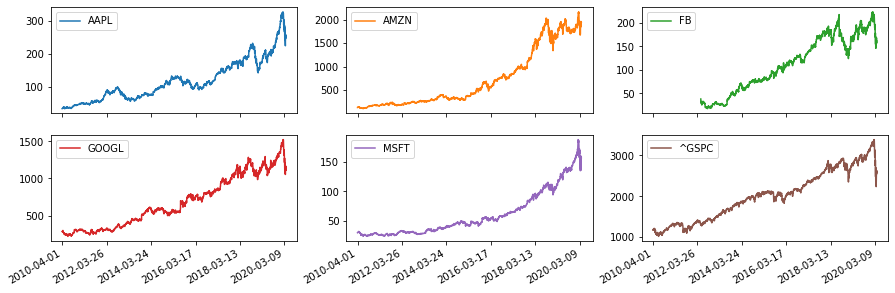

In [7]:
dataSet['Close'].plot(subplots=True,layout=(4,3),figsize=(15, 10))

# Correlation between each stocks' close price

All stocks have high correlation to others because they are all from the same sector, so we can consider to use other stock as one of the features for machine learning model

In [8]:
corr=dataSet['Close'].corr()
corr.style.background_gradient(cmap='coolwarm')

,AAPL,AMZN,FB,GOOGL,MSFT,^GSPC
AAPL,1.000000,0.928658,0.876264,0.939646,0.959813,0.942472
AMZN,0.928658,1.000000,0.910166,0.956553,0.969042,0.926512
FB,0.876264,0.910166,1.000000,0.970370,0.885208,0.962072
GOOGL,0.939646,0.956553,0.970370,1.000000,0.942822,0.981141
MSFT,0.959813,0.969042,0.885208,0.942822,1.000000,0.923016
^GSPC,0.942472,0.926512,0.962072,0.981141,0.923016,1.000000


# Autocorrelation of close price for all stocks
Auto correlation is the correlation of a signal with a delayed copy of itself as a function of delay. The chart below shows that the correlation is high in closer period. So predicting values in shorter future should be easier.

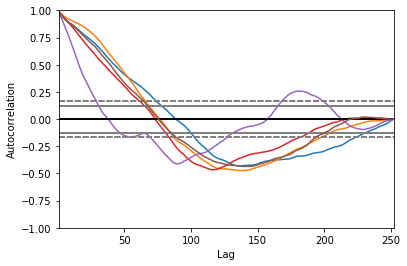

In [9]:
"""
def estimated_autocorrelation(x):
#http://stackoverflow.com/q/14297012/190597
#http://en.wikipedia.org/wiki/Autocorrelation#Estimation
n = len(x)
variance = x.var()
x = x-x.mean()
r = np.correlate(x, x, mode = 'full')[-n:]
assert np.allclose(r, np.array([(x[:n-k]*x[-(n-k):]).sum() for k in range(n)]))
result = r/(variance*(np.arange(n, 0, -1)))
return result
"""

from pandas.plotting import autocorrelation_plot

for ticker in Tickers:
    autocorrelation_plot(dataSet['Close',ticker][:252], )
    

# Get the exponential moving average as an extra feature(input)
Stock price oscillates very quickly, a exponential moving average would give a stable trend for model input. We will have a 20 days exponential moving average. Since more recent price is more important so we use exponential smoothing here.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023B96B91A08>,
      dtype=object)

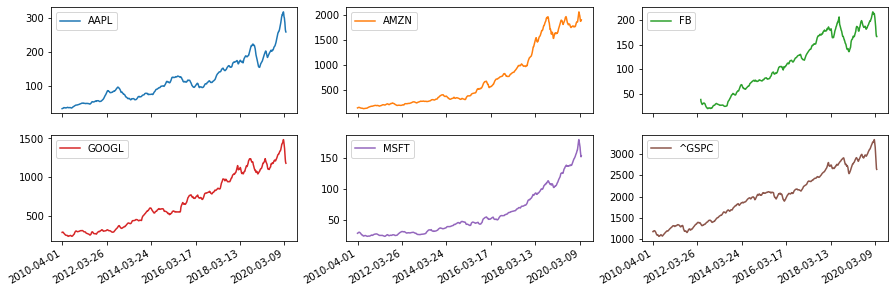

In [10]:
for ticker in Tickers:
    dataSet['Close_ema_20',ticker]= pd.Series.ewm(dataSet['Close',ticker], span=20).mean()
    
dataSet['Close_ema_20'].plot(subplots=True,layout=(4,3),figsize=(15, 10))

# Get the daily return as an extra feature(input)

Return(rate of change of the price) is another factor many investors often focus on, so we create a short-term return(daily) and a long-term(60 days) return as one of our feature input.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023B97478208>,
      dtype=object)

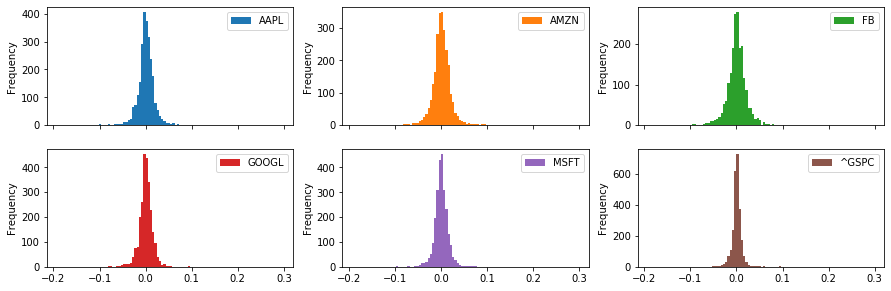

In [11]:
for ticker in Tickers:
    dataSet['Return',ticker] = dataSet['Close',ticker].pct_change()
       
dataSet['Return'].plot.hist(bins=100,subplots=True,layout=(4,3),figsize=(15, 10))

In [12]:
corr=dataSet['Return'].corr()
corr.style.background_gradient(cmap='coolwarm')

,AAPL,AMZN,FB,GOOGL,MSFT,^GSPC
AAPL,1.000000,0.424493,0.355189,0.516959,0.528196,0.653195
AMZN,0.424493,1.000000,0.424557,0.572900,0.509586,0.566719
FB,0.355189,0.424557,1.000000,0.470812,0.385770,0.459248
GOOGL,0.516959,0.572900,0.470812,1.000000,0.589999,0.677001
MSFT,0.528196,0.509586,0.385770,0.589999,1.000000,0.746756
^GSPC,0.653195,0.566719,0.459248,0.677001,0.746756,1.000000


# Get the 60 days return as an extra feature(input)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023B98F75DC8>,
      dtype=object)

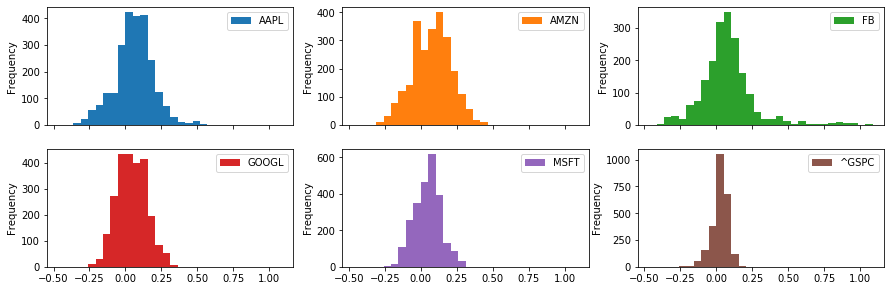

In [13]:
for ticker in Tickers:
    dataSet['Return_60',ticker] = dataSet['Close',ticker].pct_change(60)
       
dataSet['Return_60'].plot.hist(bins=30,subplots=True,layout=(4,3),figsize=(15, 10))


In [14]:
corr=dataSet['Return_60'].corr()
corr.style.background_gradient(cmap='coolwarm')

,AAPL,AMZN,FB,GOOGL,MSFT,^GSPC
AAPL,1.000000,0.188794,0.094720,0.239931,0.442272,0.500390
AMZN,0.188794,1.000000,0.174074,0.474514,0.227434,0.305462
FB,0.094720,0.174074,1.000000,0.131609,-0.076156,0.184179
GOOGL,0.239931,0.474514,0.131609,1.000000,0.410895,0.514603
MSFT,0.442272,0.227434,-0.076156,0.410895,1.000000,0.547150
^GSPC,0.500390,0.305462,0.184179,0.514603,0.547150,1.000000


### correlations for last 500 days
the correlation is stronger than correlation for the whole period

In [15]:
corr=dataSet['Return_60'][2000:2500].corr()
corr.style.background_gradient(cmap='coolwarm')

,AAPL,AMZN,FB,GOOGL,MSFT,^GSPC
AAPL,1.000000,0.466759,0.401115,0.648132,0.732734,0.826951
AMZN,0.466759,1.000000,0.442886,0.475760,0.723593,0.608700
FB,0.401115,0.442886,1.000000,0.622525,0.578206,0.670313
GOOGL,0.648132,0.475760,0.622525,1.000000,0.585523,0.778593
MSFT,0.732734,0.723593,0.578206,0.585523,1.000000,0.844899
^GSPC,0.826951,0.608700,0.670313,0.778593,0.844899,1.000000


# Get the 20days volatility as an extra feature(input)

Volatility(standard deviation) is a measure of the dispersion of returns which many investor would focus on. Here we would have 20 days and 60 days volatility as our extra feature inputs.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023B9952E8C8>,
      dtype=object)

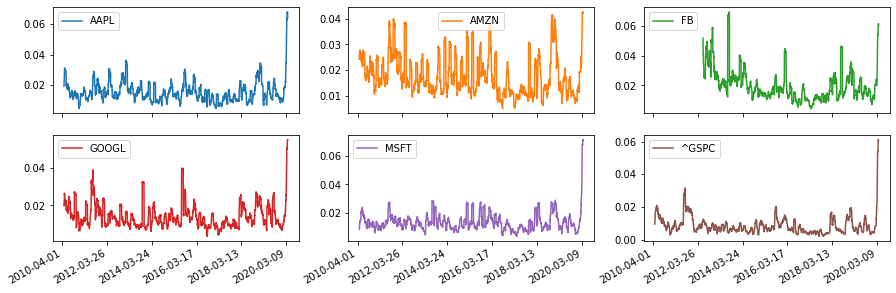

In [16]:
for ticker in Tickers:
    dataSet['Volatility_20',ticker] = dataSet['Return',ticker].rolling(20).std()
    
dataSet['Volatility_20'].plot.line( subplots=True,layout=(4,3),figsize=(15, 10))

In [17]:
corr=dataSet['Volatility_20'].corr()
corr.style.background_gradient(cmap='coolwarm')

,AAPL,AMZN,FB,GOOGL,MSFT,^GSPC
AAPL,1.000000,0.617741,0.503473,0.625106,0.718715,0.729445
AMZN,0.617741,1.000000,0.428442,0.625100,0.608328,0.582169
FB,0.503473,0.428442,1.000000,0.391544,0.476398,0.401568
GOOGL,0.625106,0.625100,0.391544,1.000000,0.642365,0.682538
MSFT,0.718715,0.608328,0.476398,0.642365,1.000000,0.773646
^GSPC,0.729445,0.582169,0.401568,0.682538,0.773646,1.000000


# Get the 60 days volatility as an extra feature(input)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023B99A62048>,
      dtype=object)

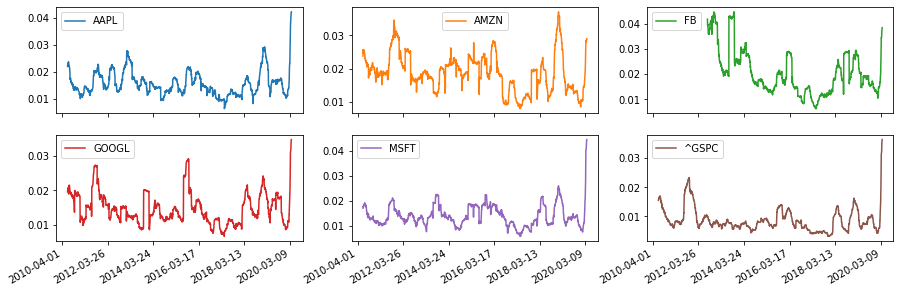

In [18]:
for ticker in Tickers:
    dataSet['Volatility_60',ticker] = dataSet['Return',ticker].rolling(60).std()
    
dataSet['Volatility_60'].plot.line( subplots=True,layout=(4,3),figsize=(15, 10))

In [19]:
corr=dataSet['Volatility_60'].corr()
corr.style.background_gradient(cmap='coolwarm')

,AAPL,AMZN,FB,GOOGL,MSFT,^GSPC
AAPL,1.000000,0.605457,0.466387,0.588051,0.690694,0.698381
AMZN,0.605457,1.000000,0.298114,0.620095,0.602022,0.665721
FB,0.466387,0.298114,1.000000,0.259442,0.387573,0.307400
GOOGL,0.588051,0.620095,0.259442,1.000000,0.617576,0.758259
MSFT,0.690694,0.602022,0.387573,0.617576,1.000000,0.754598
^GSPC,0.698381,0.665721,0.307400,0.758259,0.754598,1.000000


# Get the 14 days RSI
RSI is a momentum indicator that measures the magnitude of recent price changes to evaluate overbought or oversold. Here we use the standard 14 days RSI as an extra feature input.

In [20]:
def RSI_df(dfi):
    #df = pd.DataFrame(columns = ["Close"])
    #df["Close"]=dfi 
    
    
    df = pd.DataFrame(index=dfi.index, columns= ['close']) 
    df['close'] = dfi.values
    df['change'] = df['close'].diff().values
    
    df['gain'] = df['change'][df['change']>0]
    df['loss'] = df['change'][df['change']<0]
    df['gain'] =df['gain'].fillna(0)
    df['loss'] =df['loss'].fillna(0)
    
    df['gain_ema'] = df['gain'].ewm(span =14,ignore_na =True).mean()
    df['loss_ema'] = df['loss'].ewm(span =14,ignore_na =True).mean()
    df['RS'] = df['gain_ema'].values/df['loss_ema'].values
    df['RSI'] = 100-(100/(1-df['RS']))
    
    return df['RSI']


C:\Users\ANPC\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\ANPC\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023B99CCC1C8>,
      dtype=object)

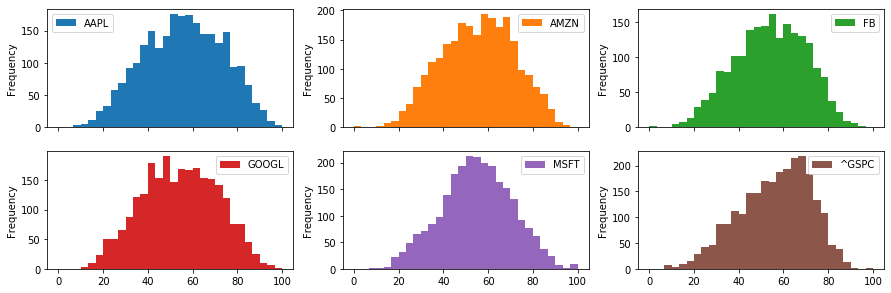

In [21]:
for ticker in Tickers:
    dataSet['RSI_14',ticker] = RSI_df(dataSet['Close',ticker] )
    
dataSet['RSI_14'].plot.hist(bins =30,subplots=True,layout=(4,3),figsize=(15, 10))


In [22]:
corr=dataSet['RSI_14'].corr()
corr.style.background_gradient(cmap='coolwarm')

,AAPL,AMZN,FB,GOOGL,MSFT,^GSPC
AAPL,1.000000,0.368409,0.328236,0.431729,0.486932,0.580548
AMZN,0.368409,1.000000,0.449500,0.555608,0.473335,0.548667
FB,0.328236,0.449500,1.000000,0.443694,0.323723,0.405646
GOOGL,0.431729,0.555608,0.443694,1.000000,0.521393,0.616386
MSFT,0.486932,0.473335,0.323723,0.521393,1.000000,0.663584
^GSPC,0.580548,0.548667,0.405646,0.616386,0.663584,1.000000


# Review the data again
Since we have added moving average, return, volatility and RSI to our dataset, now the dataset has more features. 78 columns now

In [23]:
dataSet

Close                                                    \
                  AAPL         AMZN          FB        GOOGL        MSFT   
2010-04-01   33.709999   131.809998         NaN   284.684692   29.160000   
2010-04-05   34.070000   131.490005         NaN   285.790802   29.270000   
2010-04-06   34.220001   135.559998         NaN   284.394409   29.320000   
2010-04-07   34.371429   134.869995         NaN   282.052063   29.350000   
2010-04-08   34.278572   140.960007         NaN   284.029022   29.920000   
...                ...          ...         ...          ...         ...   
2020-03-25  245.520004  1885.839966  156.210007  1101.619995  146.919998   
2020-03-26  258.440002  1955.489990  163.339996  1162.920044  156.110001   
2020-03-27  247.740005  1900.099976  156.789993  1110.260010  149.699997   
2020-03-30  254.809998  1963.949951  165.949997  1146.310059  160.229996   
2020-03-31  254.289993  1949.719971  166.800003  1161.949951  157.710007   

                          Adj Close                                        \
                  ^GSPC        AAPL         AMZN          FB        GOOGL   
2010-04-01  1178.099976   29.261658   131.809998         NaN   284.684692   
2010-04-05  1187.439941   29.574146   131.490005         NaN   285.790802   
2010-04-06  1189.439941   29.704361   135.559998         NaN   284.394409   
2010-04-07  1182.449951   29.835800   134.869995         NaN   282.052063   
2010-04-08  1186.439941   29.755198   140.960007         NaN   284.029022   
...                 ...         ...          ...         ...          ...   
2020-03-25  2475.560059  245.520004  1885.839966  156.210007  1101.619995   
2020-03-26  2630.070068  258.440002  1955.489990  163.339996  1162.920044   
2020-03-27  2541.469971  247.740005  1900.099976  156.789993  1110.260010   
2020-03-30  2626.649902  254.809998  1963.949951  165.949997  1146.310059   
2020-03-31  2584.590088  254.289993  1949.719971  166.800003  1161.949951   

            ... Volatility_60                                    RSI_14  \
            ...            FB     GOOGL      MSFT     ^GSPC        AAPL   
2010-04-01  ...           NaN       NaN       NaN       NaN         NaN   
2010-04-05  ...           NaN       NaN       NaN       NaN  100.000000   
2010-04-06  ...           NaN       NaN       NaN       NaN  100.000000   
2010-04-07  ...           NaN       NaN       NaN       NaN  100.000000   
2010-04-08  ...           NaN       NaN       NaN       NaN   83.740942   
...         ...           ...       ...       ...       ...         ...   
2020-03-25  ...      0.036850  0.033336  0.042548  0.034881   44.490855   
2020-03-26  ...      0.037357  0.034161  0.043301  0.035913   52.061203   
2020-03-27  ...      0.037649  0.034618  0.043636  0.036126   46.058703   
2020-03-30  ...      0.038358  0.034772  0.044512  0.036409   50.417158   
2020-03-31  ...      0.038371  0.034830  0.044531  0.036444   50.073792   

                                                                      
                 AMZN         FB       GOOGL        MSFT       ^GSPC  
2010-04-01        NaN        NaN         NaN         NaN         NaN  
2010-04-05   0.000000        NaN  100.000000  100.000000  100.000000  
2010-04-06  93.620731        NaN   40.705726  100.000000  100.000000  
2010-04-07  79.129207        NaN   18.953739  100.000000   55.587176  
2010-04-08  91.899136        NaN   46.694147  100.000000   65.638507  
...               ...        ...         ...         ...         ...  
2020-03-25  52.062381  44.322027   41.474758   48.604599   44.746552  
2020-03-26  59.277674  51.528870   50.821683   56.710140   53.787516  
2020-03-27  52.084157  45.311955   43.875919   50.322890   48.533161  
2020-03-30  58.743346  54.223774   49.344449   59.062507   53.565080  
2020-03-31  56.716399  55.008785   51.700268   56.326200   50.738743  

[2517 rows x 72 columns]

# Review single stock data

In [24]:
Single= dataSet.xs('AAPL', level=1, axis=1)
Single

,Close,Adj Close,Open,High,Low,Volume,Close_ema_20,Return,Return_60,Volatility_20,Volatility_60,RSI_14
2010-04-01,33.709999,29.261658,33.915714,34.104286,33.250000,150786300,33.709999,NaN,NaN,NaN,NaN,NaN
2010-04-05,34.070000,29.574146,33.568573,34.072857,33.538570,171126900,33.899000,0.010679,NaN,NaN,NaN,100.000000
2010-04-06,34.220001,29.704361,34.028572,34.320000,33.857143,111754300,34.016869,0.004403,NaN,NaN,NaN,100.000000
2010-04-07,34.371429,29.835800,34.221428,34.560001,34.094284,157125500,34.119225,0.004425,NaN,NaN,NaN,100.000000
2010-04-08,34.278572,29.755198,34.348572,34.505714,34.005714,143247300,34.157770,-0.002702,NaN,NaN,NaN,83.740942
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-25,245.520004,245.520004,250.750000,258.250000,244.300003,75900500,262.464774,-0.005509,-0.152795,0.067645,0.041422,44.490855
2020-03-26,258.440002,258.440002,246.520004,258.679993,246.360001,63021800,262.081462,0.052623,-0.113474,0.067392,0.042007,52.061203
2020-03-27,247.740005,247.740005,252.750000,255.869995,247.050003,51054200,260.715609,-0.041402,-0.156343,0.068004,0.042310,46.058703
2020-03-30,254.809998,254.809998,250.740005,255.520004,249.399994,41994100,260.153170,0.028538,-0.151623,0.064667,0.042373,50.417158


## Scatter plot of one stock
We can roughly see the relationships between each data columns\
Actually every stock has similar pattern


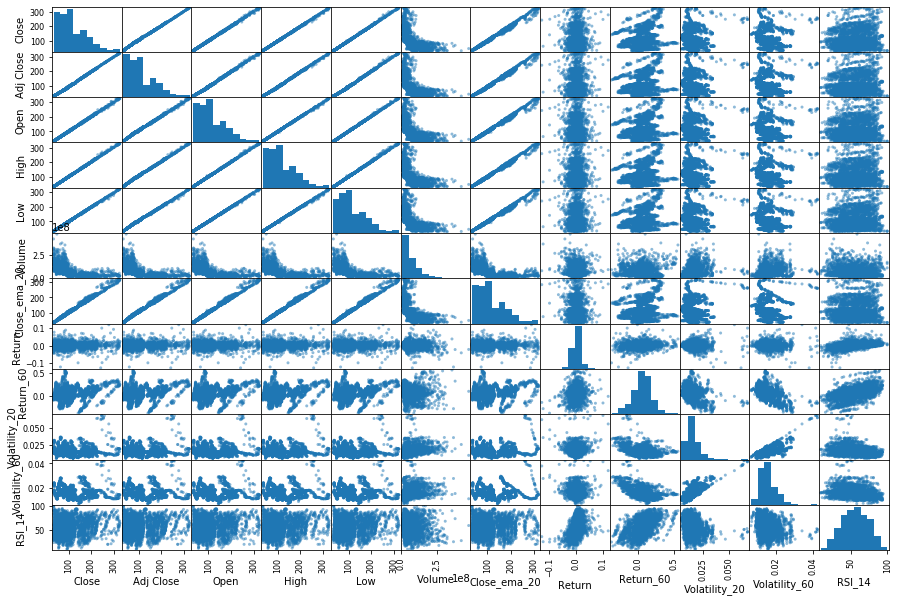

In [25]:
pd.plotting.scatter_matrix(Single,figsize=(15, 10));

## The correlation of one stock
The color map shows the strength of correlation of each feature. All the price realted features have very high correlation to our target(Close Price). The long-term(60 days) return has a weak correlation to the close price while the volume has a weak inverse correlation.

In [26]:
Single.corr().style.background_gradient(cmap='coolwarm')

,Close,Adj Close,Open,High,Low,Volume,Close_ema_20,Return,Return_60,Volatility_20,Volatility_60,RSI_14
Close,1.000000,0.999451,0.999581,0.999755,0.999764,-0.589406,0.996481,0.014479,0.193144,0.011587,-0.074481,0.102174
Adj Close,0.999451,1.000000,0.999014,0.999245,0.999178,-0.588015,0.996231,0.013670,0.186440,0.015886,-0.069055,0.100559
Open,0.999581,0.999014,1.000000,0.999778,0.999765,-0.588785,0.996682,-0.004461,0.190939,0.011231,-0.074548,0.094347
High,0.999755,0.999245,0.999778,1.000000,0.999613,-0.584929,0.997279,0.002050,0.188740,0.018769,-0.068818,0.093754
Low,0.999764,0.999178,0.999765,0.999613,1.000000,-0.593706,0.995974,0.004795,0.194802,0.004651,-0.079628,0.102574
Volume,-0.589406,-0.588015,-0.588785,-0.584929,-0.593706,1.000000,-0.582165,-0.067331,-0.008195,0.277359,0.238450,-0.133263
Close_ema_20,0.996481,0.996231,0.996682,0.997279,0.995974,-0.582165,1.000000,-0.016706,0.150501,0.049581,-0.045296,0.039213
Return,0.014479,0.013670,-0.004461,0.002050,0.004795,-0.067331,-0.016706,1.000000,0.134010,-0.020714,-0.027809,0.414987
Return_60,0.193144,0.186440,0.190939,0.188740,0.194802,-0.008195,0.150501,0.134010,1.000000,-0.380238,-0.519307,0.493098
Volatility_20,0.011587,0.015886,0.011231,0.018769,0.004651,0.277359,0.049581,-0.020714,-0.380238,1.000000,0.737450,-0.251475


# Data Cleaning: fill nan with 0

Some stocks has no value at the beginning( not yet available in the markert at the that time), so we would fill 0 for all those NaN values at the beginning. 

In [27]:
dataSet.isnull().values.sum()

7308

In [28]:
dataSet= dataSet.fillna(0)

In [29]:
dataSet.isnull().values.any()

False

# Save the data into CSV file and test loading data

In [30]:
dataSet.to_csv(r'transformed_dataset.csv', index = True)

In [31]:
dataSet_new = pd.read_csv(r'transformed_dataset.csv',header=[0, 1],**read_csv_setting)

In [32]:
dataSet_new

Close                                                    \
                  AAPL         AMZN          FB        GOOGL        MSFT   
2010-04-01   33.709999   131.809998    0.000000   284.684692   29.160000   
2010-04-05   34.070000   131.490005    0.000000   285.790802   29.270000   
2010-04-06   34.220001   135.559998    0.000000   284.394409   29.320000   
2010-04-07   34.371429   134.869995    0.000000   282.052063   29.350000   
2010-04-08   34.278572   140.960007    0.000000   284.029022   29.920000   
...                ...          ...         ...          ...         ...   
2020-03-25  245.520004  1885.839966  156.210007  1101.619995  146.919998   
2020-03-26  258.440002  1955.489990  163.339996  1162.920044  156.110001   
2020-03-27  247.740005  1900.099976  156.789993  1110.260010  149.699997   
2020-03-30  254.809998  1963.949951  165.949997  1146.310059  160.229996   
2020-03-31  254.289993  1949.719971  166.800003  1161.949951  157.710007   

                          Adj Close                                        \
                  ^GSPC        AAPL         AMZN          FB        GOOGL   
2010-04-01  1178.099976   29.261658   131.809998    0.000000   284.684692   
2010-04-05  1187.439941   29.574146   131.490005    0.000000   285.790802   
2010-04-06  1189.439941   29.704361   135.559998    0.000000   284.394409   
2010-04-07  1182.449951   29.835800   134.869995    0.000000   282.052063   
2010-04-08  1186.439941   29.755198   140.960007    0.000000   284.029022   
...                 ...         ...          ...         ...          ...   
2020-03-25  2475.560059  245.520004  1885.839966  156.210007  1101.619995   
2020-03-26  2630.070068  258.440002  1955.489990  163.339996  1162.920044   
2020-03-27  2541.469971  247.740005  1900.099976  156.789993  1110.260010   
2020-03-30  2626.649902  254.809998  1963.949951  165.949997  1146.310059   
2020-03-31  2584.590088  254.289993  1949.719971  166.800003  1161.949951   

            ... Volatility_60                                    RSI_14  \
            ...            FB     GOOGL      MSFT     ^GSPC        AAPL   
2010-04-01  ...      0.000000  0.000000  0.000000  0.000000    0.000000   
2010-04-05  ...      0.000000  0.000000  0.000000  0.000000  100.000000   
2010-04-06  ...      0.000000  0.000000  0.000000  0.000000  100.000000   
2010-04-07  ...      0.000000  0.000000  0.000000  0.000000  100.000000   
2010-04-08  ...      0.000000  0.000000  0.000000  0.000000   83.740942   
...         ...           ...       ...       ...       ...         ...   
2020-03-25  ...      0.036850  0.033336  0.042548  0.034881   44.490855   
2020-03-26  ...      0.037357  0.034161  0.043301  0.035913   52.061203   
2020-03-27  ...      0.037649  0.034618  0.043636  0.036126   46.058703   
2020-03-30  ...      0.038358  0.034772  0.044512  0.036409   50.417158   
2020-03-31  ...      0.038371  0.034830  0.044531  0.036444   50.073792   

                                                                      
                 AMZN         FB       GOOGL        MSFT       ^GSPC  
2010-04-01   0.000000   0.000000    0.000000    0.000000    0.000000  
2010-04-05   0.000000   0.000000  100.000000  100.000000  100.000000  
2010-04-06  93.620731   0.000000   40.705726  100.000000  100.000000  
2010-04-07  79.129207   0.000000   18.953739  100.000000   55.587176  
2010-04-08  91.899136   0.000000   46.694147  100.000000   65.638507  
...               ...        ...         ...         ...         ...  
2020-03-25  52.062381  44.322027   41.474758   48.604599   44.746552  
2020-03-26  59.277674  51.528870   50.821683   56.710140   53.787516  
2020-03-27  52.084157  45.311955   43.875919   50.322890   48.533161  
2020-03-30  58.743346  54.223774   49.344449   59.062507   53.565080  
2020-03-31  56.716399  55.008785   51.700268   56.326200   50.738743  

[2517 rows x 72 columns]